0.0


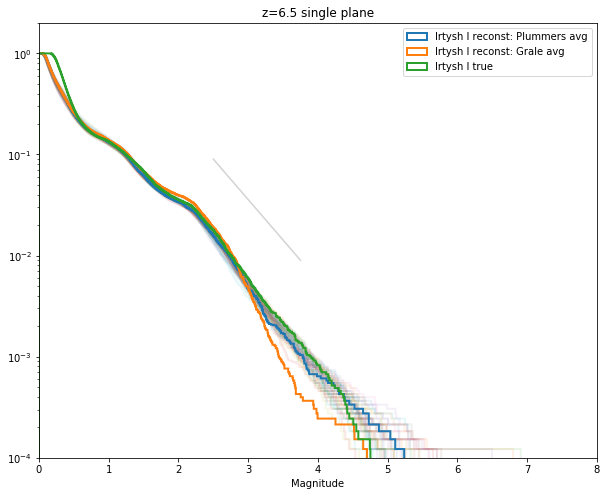

In [2]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc



mag1= np.genfromtxt('../IrtyshI_longz/mag.dat', dtype=(
    {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))


b=np.split(mag1, 15)
b[7]['mag'][0]=1
mt=2.5*np.log10(b[7]['mag'])

mag= np.genfromtxt('../reIrtysh150_plum/mag0.dat', dtype=(
    {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
mag['mag'][0]=1
mrp=2.5*np.log10(mag['mag'])

# print(mu)
muavg = [0 for n in range(32761)]
muavgsq= [0 for n in range(32761)]
# print(mu)
run_num=40
n_bins = 1000
j=0
fig, ax = plt.subplots(figsize=(10, 8))
for filename in glob.glob('mag*.dat'):
    j=j+1
#     print(j)
    mag= np.genfromtxt(filename, dtype=(
        {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
         'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
    mag['mag'][0]=1
    nparray=mag['mag']
    muavg=muavg+abs(nparray)
    muavgsq=muavgsq+nparray*nparray
    nparray[nparray == 0] = np.nan
    m=2.5*np.log10(nparray)
    
#     print(len(m))
    ax.hist(m, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,alpha=0.1)

muavg[muavg == 0] = np.nan
muavgsq[muavgsq == 0] = np.nan
mugrale=muavg/run_num
muavg=abs(2.5*np.log10(muavg/run_num))
muavg[0]=0
muavgsq=2.5*np.log10(muavgsq/run_num)

ax.hist(mrp, n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I reconst: Plummers avg',linewidth=2) # Will multiplying help?
ax.hist(muavg, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Irtysh I reconst: Grale avg')
ax.hist(mt, n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I true',linewidth=2) # Will multiplying help?
ax.plot([2.5,3.75],[0.09,0.009],color="LightGray")

# ax.hist(abs(mrp-mt), n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I absolute difference: Plummers avg',linewidth=2) # Will multiplying help?
# ax.hist(abs(muavg-mt), n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I absolute difference: Grale avg',linewidth=2) # Will multiplying help?

# print(muavgsq)
print(min(muavg))
# plt.grid(True)
plt.axis([0, 8, 0.0001, 2])
plt.yscale('log')
ax.set_title('z=6.5 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
fig.savefig('z6.5_ind_runs.png', dpi=300)

In [4]:
muerr=abs(muavgsq-muavg*muavg)**0.5
sample = open('errmag.dat', 'w') 
for i in range(len(muavg)):
    print('%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf'%(mag['xs'][i],mag['ys'][i],mrp[i],muavg[i], 
                                                                                    muavgsq[i], muerr[i],abs(muavg[i]-mt[i])/mt[i],abs(mrp[i]-mt[i])/mt[i]),file=sample)
    
    


/Users/agnivaghosh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


/Users/agnivaghosh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/agnivaghosh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


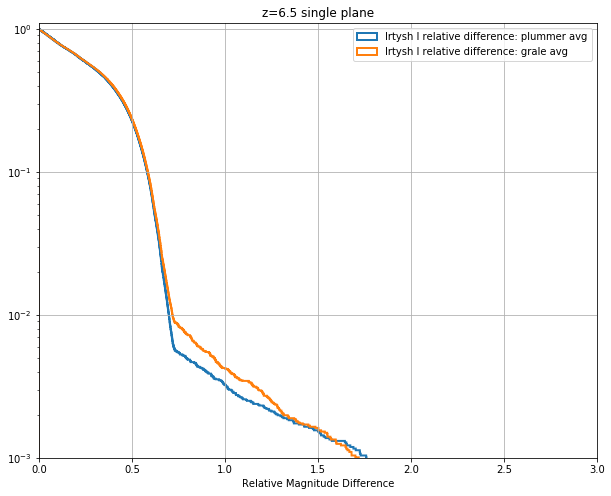

In [8]:

fig, ax = plt.subplots(figsize=(10, 8))
n_bins = 10000
# ax.hist(b[7]['mag'], n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I true',linewidth=2) # Will multiplying help?
# ax.hist(mag['mag'], n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I true',linewidth=2) # Will multiplying help?

ax.hist(abs(mrp-mt)/mt, n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I relative difference: plummer avg',linewidth=2) # Will multiplying help?
ax.hist(abs(muavg-mt)/mt, n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I relative difference: grale avg',linewidth=2) # Will multiplying help?
# ax.hist(abs(mag['mag']-b[7]['mag'])/b[7]['mag'], n_bins, density=True, histtype='step',cumulative=1, label='Irtysh I relative difference: plummer avg',linewidth=2) # Will multiplying help?
# ax.hist(abs(mugrale-b[7]['mag'])/b[7]['mag'], n_bins, density=True, histtype='step',cumulative=1, label='Irtysh I relative difference: grale avg',linewidth=2) # Will multiplying help?

plt.grid(True)
plt.axis([0, 3, 0.001, 1.1])
plt.yscale('log')
ax.set_title('z=6.5 single plane')
ax.set_xlabel('Relative Magnitude Difference')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
fig.savefig('mag_rel_error_log.png', dpi=300)